In [1]:
import os
os.chdir('/Users/urvashijaitley/Desktop')
print(os.getcwd())

/Users/urvashijaitley/Desktop


In [2]:
import pandas as pd 
df = pd.read_csv('Paris.csv')


In [8]:
#Positive reviews are seprated on the basis of star ratings

df_p = df[(df['review_lang'] == 'english') & (df['stars'] >4)]
positive = df_p['review_format']
print (positive[:5])

57     love it  the most amazing park is the walt dis...
339                                            c est top
454    disneyland paris is a must for children and ad...
511           i love it  its the best place on earth    
524    it s a great service and services and staff as...
Name: review_format, dtype: object


In [81]:
#Negative reviews are seprated on the basis of star ratings

df_n = df[(df['review_lang'] == 'english') & (df['stars'] <3)]
negative = df_n['review_format']
print (negative[:5])

92      why to have call center  is the only info you ...
1918    disneyland  is  my  favourite place  to make  ...
2499    coming for new years  don t   terrible    the ...
2552    i have been going to disneyland paris every fe...
2610    poor security  amp  staff knowing issues with ...
Name: review_format, dtype: object


In [96]:
import nltk
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
import string
stop_words=stopwords.words("english")
stop_words.extend(['n\'t','...', 'disney','br/','disneyland', 'pari','see','place','back','even','like','get','day','/span','would','park', 'one','told','http','disappoint','know','thi','could','veri','children','kid','daughter','realli','img','span'])

#Function for cleaning the text data

def clean(doc):
    tokenized=nltk.word_tokenize(doc) # step 1: tokenize
    lowercase=[i.lower() for i in tokenized] # step 2: convert to lower case
    punc_free=[i for i in lowercase if not i in string.punctuation] # step 3: convert to lower case
    normalized= [stemmer.stem(i) for i in punc_free ] #step 4: stem the each words
    stop_free=[i for i in normalized if i not in stop_words # step 5: get rid of stop words#
    return stop_free

In [97]:
# Cleaning negative reviews

clean_n = [clean(i) for i in negative]







# Creating Clusters For Positive Negative Reviews

Will be using LDA model to make the clusters of most important topics.
Model is re-run for several times for better results.

In [54]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index.
# you have to install gensim package first
from gensim import corpora
dictionary = corpora.Dictionary(clean_n) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_n] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary,  passes= 200)

# # print most significant topics, and the most important words
print(ldamodel.print_topics(num_topics=10, num_words=7))

[(0, '0.022*"class=" + 0.016*"span" + 0.014*"img" + 0.013*"thi" + 0.012*"get" + 0.011*"hotel" + 0.011*"servic"'), (1, '0.014*"thi" + 0.010*"staff" + 0.010*"time" + 0.008*"onli" + 0.007*"could" + 0.007*"daughter" + 0.006*"experi"'), (2, '0.015*"pari" + 0.014*"hour" + 0.013*"wait" + 0.010*"one" + 0.009*"veri" + 0.009*"line" + 0.009*"cancel"'), (3, '0.012*"thi" + 0.011*"day" + 0.011*"time" + 0.011*"class=" + 0.010*"close" + 0.010*"span" + 0.010*"ride"'), (4, '0.013*"veri" + 0.012*"ticket" + 0.010*"experi" + 0.010*"close" + 0.009*"even" + 0.008*"attract" + 0.007*"servic"'), (5, '0.011*"thi" + 0.009*"realli" + 0.009*"time" + 0.009*"span" + 0.009*"class=" + 0.008*"even" + 0.008*"get"'), (6, '0.016*"smoke" + 0.014*"peopl" + 0.012*"money" + 0.010*"lord" + 0.009*"thi" + 0.008*"die" + 0.008*"like"'), (7, '0.019*"ride" + 0.014*"class=" + 0.013*"span" + 0.013*"day" + 0.012*"thi" + 0.012*"get" + 0.011*"wait"'), (8, '0.020*"ride" + 0.013*"veri" + 0.012*"staff" + 0.011*"smoke" + 0.010*"kid" + 0.010*"

In [60]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index.
# you have to install gensim package first
from gensim import corpora
dictionary = corpora.Dictionary(clean_n) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_n] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary,  passes= 200)

print(ldamodel.print_topics(num_topics=10, num_words=7))

[(0, '0.014*"time" + 0.012*"realli" + 0.011*"queue" + 0.010*"span" + 0.010*"class=" + 0.008*"want" + 0.007*"even"'), (1, '0.037*"class=" + 0.027*"span" + 0.022*"img" + 0.013*"day" + 0.011*"present" + 0.011*"width=" + 0.011*"height="'), (2, '0.022*"ride" + 0.011*"smoke" + 0.010*"peopl" + 0.010*"get" + 0.010*"one" + 0.009*"span" + 0.009*"class="'), (3, '0.016*"smoke" + 0.015*"even" + 0.013*"ride" + 0.013*"pari" + 0.012*"peopl" + 0.009*"attract" + 0.008*"staff"'), (4, '0.013*"get" + 0.012*"money" + 0.009*"time" + 0.008*"day" + 0.008*"book" + 0.008*"staff" + 0.008*"much"'), (5, '0.011*"time" + 0.010*"staff" + 0.007*"room" + 0.006*"lord" + 0.006*"push" + 0.006*"one" + 0.005*"servic"'), (6, '0.019*"ride" + 0.013*"class=" + 0.013*"hour" + 0.013*"span" + 0.013*"time" + 0.012*"day" + 0.010*"get"'), (7, '0.016*"year" + 0.014*"hour" + 0.012*"pari" + 0.008*"staff" + 0.007*"magic" + 0.007*"got" + 0.006*"realli"'), (8, '0.010*"one" + 0.010*"ride" + 0.010*"get" + 0.008*"day" + 0.008*"onli" + 0.007*"t

In [63]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_n) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_n] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics= 5, id2word = dictionary,  passes= 200)

print(ldamodel.print_topics(num_topics= 5, num_words=7))

[(0, '0.012*"realli" + 0.011*"staff" + 0.010*"ride" + 0.010*"time" + 0.009*"pari" + 0.008*"class=" + 0.008*"smoke"'), (1, '0.011*"class=" + 0.011*"span" + 0.010*"onli" + 0.010*"get" + 0.010*"day" + 0.009*"charact" + 0.008*"ride"'), (2, '0.010*"servic" + 0.009*"one" + 0.008*"day" + 0.008*"get" + 0.008*"pari" + 0.008*"money" + 0.007*"custom"'), (3, '0.019*"class=" + 0.014*"span" + 0.010*"time" + 0.009*"staff" + 0.009*"img" + 0.008*"peopl" + 0.007*"day"'), (4, '0.023*"ride" + 0.013*"hour" + 0.011*"day" + 0.011*"wait" + 0.010*"close" + 0.010*"time" + 0.009*"queue"')]


In [66]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_n) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_n] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics= 7, id2word = dictionary,  passes= 500)

print(ldamodel.print_topics(num_topics= 7, num_words=7))

[(0, '0.013*"one" + 0.009*"get" + 0.009*"ride" + 0.008*"day" + 0.008*"never" + 0.007*"close" + 0.007*"onli"'), (1, '0.011*"smoke" + 0.010*"pari" + 0.009*"pay" + 0.009*"day" + 0.009*"place" + 0.008*"time" + 0.008*"peopl"'), (2, '0.030*"class=" + 0.009*"ride" + 0.008*"get" + 0.008*"day" + 0.008*"wait" + 0.007*"peopl" + 0.006*"_5mfr"'), (3, '0.012*"time" + 0.011*"day" + 0.010*"hotel" + 0.010*"pari" + 0.009*"year" + 0.008*"even" + 0.007*"want"'), (4, '0.014*"ride" + 0.009*"queue" + 0.008*"class=" + 0.008*"even" + 0.007*"close" + 0.007*"time" + 0.007*"attract"'), (5, '0.014*"ride" + 0.014*"get" + 0.013*"time" + 0.012*"class=" + 0.011*"staff" + 0.010*"hour" + 0.009*"wait"'), (6, '0.012*"hour" + 0.009*"book" + 0.009*"day" + 0.008*"ticket" + 0.008*"see" + 0.008*"servic" + 0.008*"money"')]


In [72]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_n) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_n] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics= 7, id2word = dictionary,  passes= 500)

print(ldamodel.print_topics(num_topics= 7, num_words=7))

[(0, '0.011*"day" + 0.010*"attract" + 0.009*"food" + 0.008*"close" + 0.007*"time" + 0.007*"ride" + 0.006*"mani"'), (1, '0.011*"hour" + 0.011*"staff" + 0.010*"money" + 0.010*"charact" + 0.009*"time" + 0.008*"see" + 0.008*"queue"'), (2, '0.012*"ride" + 0.011*"day" + 0.009*"book" + 0.008*"close" + 0.008*"get" + 0.008*"onli" + 0.008*"staff"'), (3, '0.010*"come" + 0.008*"pari" + 0.008*"day" + 0.008*"rude" + 0.008*"time" + 0.007*"servic" + 0.007*"year"'), (4, '0.020*"ride" + 0.017*"time" + 0.015*"hour" + 0.014*"day" + 0.010*"get" + 0.010*"wait" + 0.007*"close"'), (5, '0.012*"ride" + 0.011*"year" + 0.011*"staff" + 0.009*"pari" + 0.008*"onli" + 0.008*"got" + 0.007*"rude"'), (6, '0.012*"ride" + 0.012*"one" + 0.011*"get" + 0.011*"time" + 0.009*"wait" + 0.008*"even" + 0.008*"year"')]


In [75]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_n) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_n] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics= 7, id2word = dictionary,  passes= 100)


In [73]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_n) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_n] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics= 10, id2word = dictionary,  passes= 500)

print(ldamodel.print_topics(num_topics= 10 , num_words= 10))

[(0, '0.013*"ride" + 0.012*"hour" + 0.012*"charact" + 0.011*"one" + 0.011*"queue" + 0.009*"get" + 0.009*"visit" + 0.009*"restaur" + 0.009*"onli" + 0.008*"time"'), (1, '0.012*"ride" + 0.012*"pari" + 0.011*"time" + 0.011*"see" + 0.009*"money" + 0.008*"one" + 0.007*"experi" + 0.007*"hotel" + 0.007*"onli" + 0.006*"charact"'), (2, '0.021*"staff" + 0.016*"time" + 0.012*"ride" + 0.012*"rude" + 0.011*"year" + 0.011*"attract" + 0.011*"onli" + 0.010*"day" + 0.010*"get" + 0.009*"charact"'), (3, '0.023*"get" + 0.015*"hour" + 0.011*"one" + 0.011*"ride" + 0.010*"day" + 0.010*"pass" + 0.007*"even" + 0.007*"food" + 0.007*"wait" + 0.007*"got"'), (4, '0.014*"book" + 0.008*"pari" + 0.007*"food" + 0.007*"call" + 0.007*"cancel" + 0.007*"suitcas" + 0.007*"old" + 0.007*"time" + 0.007*"price" + 0.006*"feel"'), (5, '0.023*"close" + 0.016*"ride" + 0.013*"attract" + 0.009*"year" + 0.008*"day" + 0.008*"coaster" + 0.008*"pari" + 0.008*"back" + 0.007*"time" + 0.007*"lot"'), (6, '0.011*"staff" + 0.009*"cancel" + 0.0

In [74]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_n) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_n] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics= 8, id2word = dictionary,  passes= 500)

print(ldamodel.print_topics(num_topics= 8 , num_words= 5))

[(0, '0.014*"ride" + 0.011*"food" + 0.010*"hour" + 0.009*"staff" + 0.008*"line"'), (1, '0.015*"time" + 0.009*"pari" + 0.009*"one" + 0.009*"money" + 0.008*"back"'), (2, '0.017*"time" + 0.015*"peopl" + 0.013*"wait" + 0.013*"day" + 0.013*"hour"'), (3, '0.017*"day" + 0.010*"ticket" + 0.009*"pari" + 0.008*"get" + 0.008*"one"'), (4, '0.009*"staff" + 0.008*"time" + 0.007*"rude" + 0.007*"onli" + 0.007*"hotel"'), (5, '0.019*"get" + 0.013*"year" + 0.010*"one" + 0.010*"hour" + 0.009*"ride"'), (6, '0.038*"ride" + 0.015*"close" + 0.011*"smoke" + 0.010*"staff" + 0.009*"peopl"'), (7, '0.012*"food" + 0.012*"rude" + 0.009*"cast" + 0.009*"place" + 0.008*"trip"')]


In [84]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_n) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_n] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics= 7, id2word = dictionary,  passes= 100)

print(ldamodel.print_topics(num_topics= 7 , num_words= 7))

[(0, '0.013*"servic" + 0.008*"book" + 0.008*"custom" + 0.008*"money" + 0.008*"ticket" + 0.007*"staff" + 0.007*"even"'), (1, '0.021*"ride" + 0.021*"hour" + 0.014*"time" + 0.014*"wait" + 0.011*"staff" + 0.010*"charact" + 0.009*"peopl"'), (2, '0.013*"attract" + 0.010*"close" + 0.009*"christma" + 0.009*"mountain" + 0.008*"time" + 0.007*"lot" + 0.007*"first"'), (3, '0.011*"time" + 0.009*"back" + 0.009*"money" + 0.009*"onli" + 0.008*"trip" + 0.008*"famili" + 0.008*"never"'), (4, '0.010*"staff" + 0.010*"rude" + 0.008*"close" + 0.008*"poor" + 0.007*"onli" + 0.007*"ticket" + 0.007*"pass"'), (5, '0.017*"ride" + 0.014*"smoke" + 0.012*"time" + 0.009*"year" + 0.009*"close" + 0.009*"staff" + 0.009*"even"'), (6, '0.012*"food" + 0.008*"queue" + 0.008*"french" + 0.008*"charact" + 0.007*"florida" + 0.007*"need" + 0.006*"onli"')]


In [85]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_n) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_n] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix5
ldamodel = Lda(doc_term_matrix, num_topics= 7, id2word = dictionary,  passes= 500)

print(ldamodel.print_topics(num_topics= 7 , num_words= 7))

[(0, '0.010*"staff" + 0.010*"like" + 0.009*"food" + 0.008*"rude" + 0.007*"french" + 0.007*"servic" + 0.007*"amp"'), (1, '0.014*"see" + 0.014*"charact" + 0.014*"staff" + 0.009*"money" + 0.009*"que" + 0.008*"rude" + 0.007*"hotel"'), (2, '0.018*"time" + 0.018*"ride" + 0.014*"hour" + 0.012*"wait" + 0.010*"queue" + 0.009*"pari" + 0.009*"even"'), (3, '0.010*"attract" + 0.010*"pari" + 0.009*"year" + 0.008*"food" + 0.007*"time" + 0.007*"onli" + 0.006*"need"'), (4, '0.019*"smoke" + 0.015*"peopl" + 0.013*"staff" + 0.009*"time" + 0.009*"ride" + 0.008*"wait" + 0.008*"stop"'), (5, '0.009*"servic" + 0.009*"book" + 0.007*"time" + 0.007*"money" + 0.006*"email" + 0.006*"close" + 0.006*"back"'), (6, '0.020*"ride" + 0.009*"peopl" + 0.009*"money" + 0.008*"place" + 0.008*"hour" + 0.008*"staff" + 0.006*"magic"')]


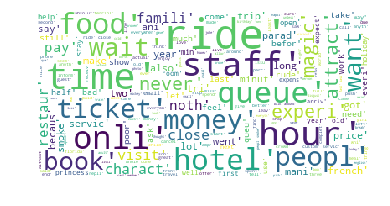

In [98]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)



wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(clean_n))

print(wordcloud2)
fig = plt.figure(1)
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)


# Creating Clusters For Positive Reviews

Will be using LDA model to make the clusters of most important topics.
Model is re-run for several times for better results.


In [43]:
import nltk
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
import string
stop_words=stopwords.words("english")
stop_words.extend(['n\'t','...', 'disney','br/','disneyland', 'staff','thank','pari','food','went','minut','amp','absolut','much','time','onli','year','wait','see','good','visit','earth','place','back','even','like','get','/span','would','park', 'cool','amaz','happi','ador','word','dream','love','great','one','told','day','land','spent','http','magic','know','thi','everi','come','lot','make','could','veri','realli','img','span'])
 

def clean(doc):
    tokenized=nltk.word_tokenize(doc) 
    lowercase=[i.lower() for i in tokenized] 
    punc_free=[i for i in lowercase if not i in string.punctuation] 
    normalized= [stemmer.stem(i) for i in punc_free]
    stop_free=[i for i in normalized if i not in stop_words 
    return stop_free

In [13]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_p) 


# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_p] 



# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix
ldamodel = Lda(doc_term_matrix, num_topics= 10, id2word = dictionary,  passes= 500)

print(ldamodel.print_topics(num_topics= 10 , num_words= 7))

[(0, '0.025*"time" + 0.020*"ride" + 0.016*"day" + 0.015*"wait" + 0.014*"queue" + 0.014*"show" + 0.014*"onli"'), (1, '0.039*"super" + 0.019*"parc" + 0.016*"tout" + 0.011*"beaucoup" + 0.011*"est" + 0.009*"europ" + 0.008*"arriv"'), (2, '0.065*"dream" + 0.058*"come" + 0.044*"true" + 0.040*"wonder" + 0.029*"magic" + 0.018*"thank" + 0.014*"nice"'), (3, '0.069*"great" + 0.037*"ride" + 0.031*"love" + 0.022*"fun" + 0.017*"much" + 0.016*"experi" + 0.016*"amaz"'), (4, '0.065*"amaz" + 0.054*"magic" + 0.042*"love" + 0.031*"christma" + 0.027*"wait" + 0.027*"visit" + 0.024*"time"'), (5, '0.018*"word" + 0.018*"amaz" + 0.015*"must" + 0.014*"cool" + 0.014*"magic" + 0.013*"trop" + 0.012*"ador"'), (6, '0.123*"love" + 0.055*"time" + 0.046*"everi" + 0.036*"year" + 0.029*"magic" + 0.018*"much" + 0.017*"amaz"'), (7, '0.146*"best" + 0.088*"ever" + 0.069*"world" + 0.022*"magic" + 0.017*"earth" + 0.016*"favourit" + 0.012*"land"'), (8, '0.022*"experi" + 0.015*"day" + 0.013*"happi" + 0.013*"amp" + 0.013*"magic" + 

In [16]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_p) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_p] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix5
ldamodel = Lda(doc_term_matrix, num_topics= 10, id2word = dictionary,  passes= 500)

print(ldamodel.print_topics(num_topics= 10 , num_words= 7))

[(0, '0.033*"mountain" + 0.023*"super" + 0.022*"beauti" + 0.021*"space" + 0.018*"visit" + 0.018*"ride" + 0.015*"thunder"'), (1, '0.032*"staff" + 0.029*"come" + 0.023*"stay" + 0.021*"time" + 0.020*"hotel" + 0.020*"world" + 0.018*"holiday"'), (2, '0.033*"time" + 0.026*"ride" + 0.016*"show" + 0.015*"parad" + 0.015*"charact" + 0.014*"wait" + 0.012*"food"'), (3, '0.018*"hotel" + 0.016*"year" + 0.014*"new" + 0.013*"staff" + 0.012*"lot" + 0.011*"food" + 0.011*"make"'), (4, '0.029*"fun" + 0.024*"ride" + 0.017*"time" + 0.017*"much" + 0.017*"experi" + 0.017*"awesom" + 0.014*"fantast"'), (5, '0.060*"time" + 0.045*"everi" + 0.044*"year" + 0.028*"visit" + 0.024*"wait" + 0.024*"next" + 0.019*"second"'), (6, '0.154*"best" + 0.082*"ever" + 0.040*"earth" + 0.021*"day" + 0.017*"visit" + 0.013*"definit" + 0.013*"happiest"'), (7, '0.023*"perfect" + 0.022*"experi" + 0.020*"day" + 0.020*"land" + 0.013*"spent" + 0.013*"truli" + 0.012*"everi"'), (8, '0.032*"time" + 0.025*"wait" + 0.023*"famili" + 0.022*"kid" 

In [19]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_p) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_p] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix5
ldamodel = Lda(doc_term_matrix, num_topics= 10, id2word = dictionary,  passes= 500)

print(ldamodel.print_topics(num_topics= 10 , num_words= 7))

[(0, '0.032*"time" + 0.027*"christma" + 0.021*"show" + 0.017*"alway" + 0.016*"parad" + 0.016*"ride" + 0.014*"onli"'), (1, '0.033*"time" + 0.023*"ride" + 0.021*"queue" + 0.015*"food" + 0.015*"long" + 0.014*"wait" + 0.012*"expect"'), (2, '0.033*"fun" + 0.033*"experi" + 0.027*"adult" + 0.026*"awesom" + 0.023*"top" + 0.021*"everyon" + 0.015*"kid"'), (3, '0.034*"ride" + 0.027*"amp" + 0.021*"mountain" + 0.020*"charact" + 0.017*"close" + 0.015*"parad" + 0.012*"space"'), (4, '0.025*"true" + 0.015*"stay" + 0.015*"well" + 0.014*"never" + 0.013*"servic" + 0.011*"forget" + 0.010*"absolut"'), (5, '0.026*"year" + 0.023*"time" + 0.017*"wait" + 0.017*"princess" + 0.014*"staff" + 0.013*"charact" + 0.013*"old"'), (6, '0.042*"time" + 0.034*"hotel" + 0.031*"staff" + 0.029*"stay" + 0.017*"friendli" + 0.017*"recommend" + 0.016*"thank"'), (7, '0.114*"best" + 0.064*"ever" + 0.058*"world" + 0.022*"beauti" + 0.018*"holiday" + 0.014*"experi" + 0.012*"super"'), (8, '0.079*"time" + 0.041*"year" + 0.031*"fantast" +

In [23]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_p) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_p] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix5
ldamodel = Lda(doc_term_matrix, num_topics= 5, id2word = dictionary,  passes= 100)

print(ldamodel.print_topics(num_topics= 5 , num_words= 7))

[(0, '0.019*"wonder" + 0.017*"holiday" + 0.017*"world" + 0.015*"staff" + 0.014*"best" + 0.011*"brilliant" + 0.011*"hotel"'), (1, '0.029*"best" + 0.020*"ever" + 0.015*"experi" + 0.014*"next" + 0.013*"went" + 0.012*"kid" + 0.011*"famili"'), (2, '0.025*"ride" + 0.016*"hotel" + 0.013*"charact" + 0.013*"stay" + 0.011*"parad" + 0.011*"show" + 0.011*"food"'), (3, '0.021*"awesom" + 0.016*"christma" + 0.015*"beauti" + 0.012*"world" + 0.009*"childhood" + 0.008*"castl" + 0.008*"amp"'), (4, '0.019*"staff" + 0.019*"true" + 0.017*"definit" + 0.016*"children" + 0.015*"thank" + 0.013*"fantast" + 0.010*"help"')]


In [24]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_p) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_p] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix5
ldamodel = Lda(doc_term_matrix, num_topics= 5, id2word = dictionary,  passes= 100)

print(ldamodel.print_topics(num_topics= 5 , num_words= 7))

[(0, '0.081*"best" + 0.050*"ever" + 0.025*"holiday" + 0.014*"world" + 0.013*"famili" + 0.011*"next" + 0.010*"definit"'), (1, '0.025*"world" + 0.019*"children" + 0.015*"wonder" + 0.015*"smoke" + 0.012*"christma" + 0.012*"beauti" + 0.012*"fun"'), (2, '0.017*"ride" + 0.014*"fantast" + 0.012*"queue" + 0.011*"food" + 0.011*"recommend" + 0.011*"absolut" + 0.010*"enjoy"'), (3, '0.020*"experi" + 0.011*"thank" + 0.011*"show" + 0.011*"ride" + 0.009*"fantast" + 0.009*"perfect" + 0.008*"true"'), (4, '0.018*"hotel" + 0.017*"staff" + 0.017*"ride" + 0.015*"stay" + 0.010*"amp" + 0.010*"experi" + 0.009*"charact"')]


In [42]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_p) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_p] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix5
ldamodel = Lda(doc_term_matrix, num_topics= 7, id2word = dictionary,  passes= 100)
print(ldamodel.print_topics(num_topics= 7 , num_words= 7))

[(0, '0.031*"stay" + 0.030*"hotel" + 0.016*"charact" + 0.016*"amp" + 0.011*"new" + 0.010*"minut" + 0.010*"ride"'), (1, '0.012*"christma" + 0.012*"fantast" + 0.010*"ride" + 0.010*"close" + 0.010*"stay" + 0.010*"next" + 0.009*"first"'), (2, '0.095*"best" + 0.055*"ever" + 0.043*"world" + 0.024*"holiday" + 0.014*"favourit" + 0.014*"first" + 0.009*"servic"'), (3, '0.031*"ride" + 0.010*"trip" + 0.009*"parad" + 0.008*"pass" + 0.008*"holiday" + 0.008*"brilliant" + 0.008*"everyth"'), (4, '0.021*"children" + 0.016*"wonder" + 0.015*"famili" + 0.015*"true" + 0.014*"fantast" + 0.014*"experi" + 0.013*"adult"'), (5, '0.020*"experi" + 0.014*"beauti" + 0.014*"fun" + 0.012*"ride" + 0.011*"top" + 0.008*"world" + 0.007*"star"'), (6, '0.017*"recommend" + 0.015*"christma" + 0.011*"charact" + 0.011*"fantast" + 0.010*"ride" + 0.010*"experi" + 0.009*"show"')]


In [45]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_p) # this is all words. All the words appearing in all the documents
#print(dictionary)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_p] # conver to a bag of words.

#print(doc_term_matrix)

# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix5
ldamodel = Lda(doc_term_matrix, num_topics= 7, id2word = dictionary,  passes= 100)
print(ldamodel.print_topics(num_topics= 7 , num_words= 7))

[(0, '0.022*"hotel" + 0.018*"stay" + 0.012*"fantast" + 0.011*"help" + 0.011*"friendli" + 0.009*"ride" + 0.008*"charact"'), (1, '0.023*"experi" + 0.022*"children" + 0.017*"kid" + 0.015*"adult" + 0.015*"hotel" + 0.014*"stay" + 0.013*"wonder"'), (2, '0.016*"return" + 0.015*"truli" + 0.014*"perfect" + 0.013*"true" + 0.012*"recommend" + 0.012*"memori" + 0.011*"famili"'), (3, '0.013*"charact" + 0.011*"everyth" + 0.010*"ride" + 0.010*"long" + 0.009*"favourit" + 0.009*"world" + 0.009*"enjoy"'), (4, '0.034*"fun" + 0.016*"christma" + 0.012*"ride" + 0.010*"charact" + 0.010*"beauti" + 0.010*"mickey" + 0.009*"experi"'), (5, '0.021*"birthday" + 0.017*"son" + 0.016*"next" + 0.012*"book" + 0.011*"super" + 0.011*"return" + 0.011*"member"'), (6, '0.040*"best" + 0.023*"ride" + 0.022*"ever" + 0.019*"world" + 0.013*"holiday" + 0.012*"parad" + 0.011*"show"')]


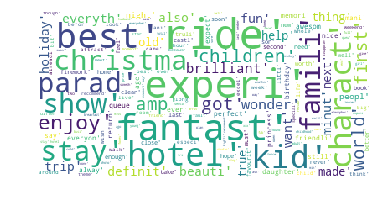

In [41]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)



wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(clean_p))

print(wordcloud2)
fig = plt.figure(1)
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)


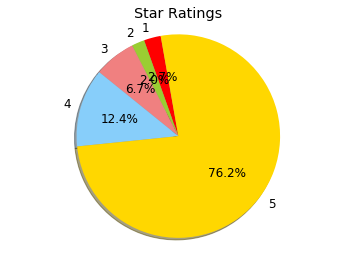

In [83]:
import matplotlib.pyplot as plt

reviewstars = df.groupby(['stars']).size()
# Data to plot
labels = reviewstars.index
sizes =  reviewstars.values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','gold']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
#plt.pie(sizes, labels=labels,

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle= 100)
plt.title('Star Ratings') 
plt.axis('equal')
plt.show()


In [86]:
Langgroup = df.groupby(['review_lang']).size()

/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:181: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



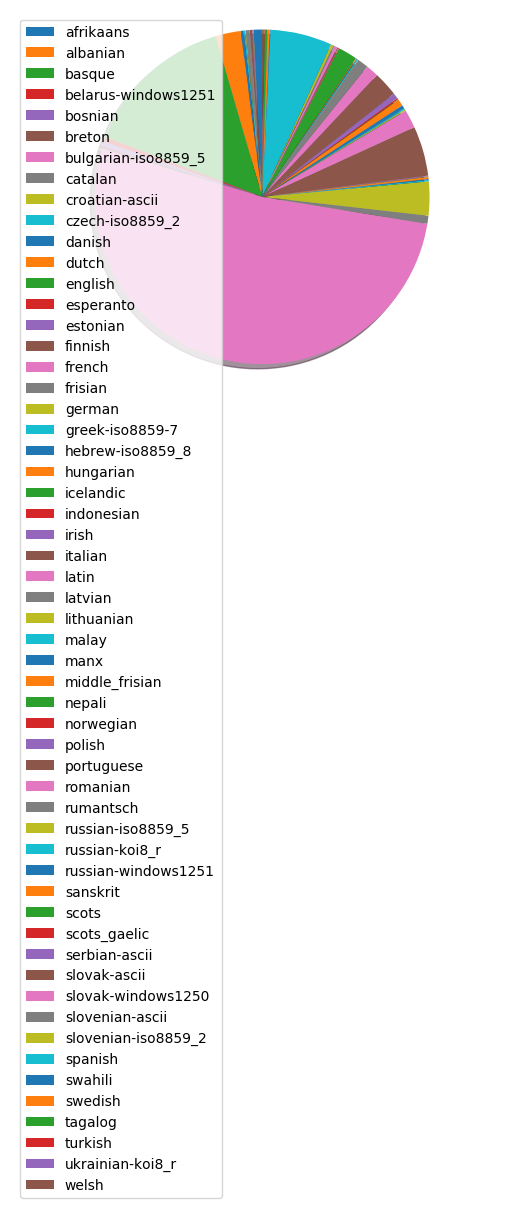

In [91]:
import matplotlib.pyplot as plt
 
labels = Langgroup.index
sizes = Langgroup.values 
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()